<a href="https://colab.research.google.com/github/vmcarranzam/Proyecto_final_CDP/blob/main/Pokemon_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final
---

Víctor Carranza - 23003112 \\
Andrés Tejeda - 23002674

### Alcance del proyecto

Pokémon es una de las franquicias de videojuegos más exitosas en la historia, desde sus inicios en 1996 hasta la actualidad con el último lanzamiento de la 9na Generación de Pokémon en 2022. Sin enmbargo, Pokémon no solo es considerado un juego casual sino que también uno competitivo. En este proyecto se realizará un análisis sobre las estadísticas de los Pokémon hasta 8va generación.

### Objetivo
* Desarrollar un pipeline utilizando Python y realizar un análisis utilizando un DataLake almacenado en un S3 de AWS 

### Fuente de información
* Un DL que contiene la información de los Pokémon hasta 8va Generación. Estos datos incluyen: Número en el PokéDex, Nombre, Tipo, estadísticas, altura, peso, entre otros.

---
Instalación e importación de librerías

In [ ]:
pip install boto3

In [ ]:
import boto3 as b3
import botocore.exceptions
from botocore.exceptions import ClientError
from sqlalchemy import create_engine

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt

In [81]:
#@title Creación de bucket (Aquí deberían ir las credenciales de AWS, se borraron por motivos de seguridad)



In [ ]:
try:
    bucket = resource.create_bucket(Bucket=bucket_name, CreateBucketConfiguration={'LocationConstraint': AWS_REGION})
    print(f"El bucket {bucket_name} de Amazon S3 fue creado")
except resource.meta.client.exceptions.BucketAlreadyExists as err:
    print(f"El bucket {bucket_name} de Amazon S3 ya existe")
    raise err

Se sube el archivo al bucket

In [ ]:
def upload_files(file_name, bucket, object_name=None, args=None):
    if object_name is None:
        object_name = file_name
    resource.meta.client.upload_file(file_name, bucket, object_name, ExtraArgs=args)
    print(f" El archivo '{file_name}' se subió al bucket '{bucket}'")

In [ ]:
upload_files('All_Pokemon.csv', bucket_name)

Se guarda el archivo del bucket en un dataframe

In [ ]:
key = 'All_Pokemon.csv'
objeto = resource.Object(bucket_name, key)
cuerpo = objeto.get()['Body'].read().decode('utf-8')
df = pd.read_csv(StringIO(cuerpo))

---
### Análisis Exploratorio

Filas iniciales

In [ ]:
df['Name'].count()

1032

In [ ]:
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [ ]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


En cada generación de los videojuegos de Pokémon se han incluído nuevas mecánicas de juego y junto a esta nuevas variantes de Pokémon ya existentes. A pesar de que estos Pokémon comparten el mismo número en el PokéDex, no podemos considerarlos como duplicados ya que poseen estadísticas diferentes. Sin embargo, existen formas llamadas **Mega Evoluciones** que son formas con estadísticas superiores a un Pokémon ordinario. Por esta razón, vamos a excluir estas variantes del análisis.

In [ ]:
pd.set_option('display.max_rows', None)
dup = df[(df['Number'].duplicated())]
dup

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.00,1.00,1.0,1.0,1.00,1.00,0.5,2.4,155.5,27.0
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,0.25,4.00,1.0,1.0,1.00,0.50,0.5,1.7,100.5,34.8
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,0.50,2.00,1.0,2.0,1.00,0.50,1.0,1.7,110.5,38.2
12,9,Mega Blastoise,Water,NaN,['Mega Launcher'],79,103,120,135,115,...,1.00,1.00,1.0,1.0,1.00,0.50,1.0,1.6,101.1,39.5
19,15,Mega Beedrill,Bug,Poison,['Adaptability'],65,150,40,15,80,...,0.50,2.00,1.0,1.0,1.00,1.00,0.5,1.4,40.5,20.7
23,18,Mega Pidgeot,Normal,Flying,['No Guard'],83,80,80,135,80,...,0.50,2.00,0.0,1.0,1.00,1.00,1.0,2.2,50.5,10.4
25,19,Alolan Rattata,Dark,Normal,"['Gluttony', 'Hustle', 'Thick Fat']",30,56,35,25,35,...,2.00,1.00,0.0,1.0,0.50,1.00,2.0,0.3,3.8,42.2
27,20,Alolan Raticate,Dark,Normal,"['Gluttony', 'Hustle', 'Thick Fat']",75,71,70,40,80,...,2.00,1.00,0.0,1.0,0.50,1.00,2.0,0.7,25.5,52.0
34,26,Alolan Raichu,Electric,Psychic,['Surge Surfer'],60,85,50,95,85,...,2.00,1.00,2.0,1.0,2.00,0.50,1.0,0.7,21.0,42.9
36,27,Alolan Sandshrew,Ice,Steel,"['Slush Rush', 'Snow Cloak']",50,75,90,10,35,...,0.50,1.00,1.0,0.5,1.00,1.00,0.5,0.7,40.0,81.6


Ahora encontramos las Mega Evoluciones

In [ ]:
pd.reset_option('max_rows')
mega = df[(df['Mega Evolution'] == 1)]
mega

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.00,1.00,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,0.25,4.00,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,0.50,2.00,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2
12,9,Mega Blastoise,Water,NaN,['Mega Launcher'],79,103,120,135,115,...,1.00,1.00,1.0,1.0,1.0,0.5,1.0,1.6,101.1,39.5
19,15,Mega Beedrill,Bug,Poison,['Adaptability'],65,150,40,15,80,...,0.50,2.00,1.0,1.0,1.0,1.0,0.5,1.4,40.5,20.7
23,18,Mega Pidgeot,Normal,Flying,['No Guard'],83,80,80,135,80,...,0.50,2.00,0.0,1.0,1.0,1.0,1.0,2.2,50.5,10.4
83,65,Mega Alakazam,Psychic,NaN,['Trace'],55,50,65,175,95,...,2.00,1.00,2.0,1.0,2.0,1.0,1.0,1.2,48.0,33.3
105,80,Mega Slowbro,Water,Psychic,['Shell Armor'],95,75,180,130,80,...,2.00,1.00,2.0,1.0,2.0,0.5,1.0,2.0,120.0,30.0
124,94,Mega Gengar,Ghost,Poison,['Shadow Tag'],60,65,80,170,95,...,0.25,1.00,2.0,1.0,2.0,1.0,0.5,1.4,40.5,20.7
149,115,Mega Kangaskhan,Normal,NaN,['Parental Bond'],105,125,100,60,100,...,1.00,1.00,0.0,1.0,1.0,1.0,1.0,2.2,100.0,20.7


---
### Transformación
Eliminamos los Pokémon considerados como Mega Evolucion

In [ ]:
df.drop(labels=mega.index, axis=0, inplace=True)

Volvemos a contar nuestras filas y observamos que tenemos menos que el df original.

In [ ]:
df['Number'].count()

982

Buscamos por valores nulos en el dataframe. Únicamente se encuentran presentes en la columna *Type 2*, lo cuál es válido ya que no todos los Pokémon cuentan con 2 tipos diferentes.

In [ ]:
for columna in df.columns:
  if df[columna].isna().any():
    print(df[df[columna].isna()][columna])

4       NaN
5       NaN
9       NaN
10      NaN
11      NaN
       ... 
1021    NaN
1025    NaN
1026    NaN
1027    NaN
1028    NaN
Name: Type 2, Length: 474, dtype: object


Eliminamos la columnas que no aportan a nuestro análisis

In [ ]:
df.drop(labels=['Mean', 'Standard Deviation', 'Mega Evolution', 'BMI'], axis=1, inplace=True)

---
### RDS
Inicializamos una instancia en RDS

In [ ]:
rdsIdentifier = 'pokemon-db'

In [ ]:
aws_conn = b3.client('rds', aws_access_key_id=ACCESS_KEY,
                    aws_secret_access_key=SECRET_ACCESS_KEY,
                    region_name=AWS_REGION)

Verificamos Instancias de RDS disponibles

In [ ]:
rdsInstanceIds = []

response = aws_conn.describe_db_instances()
for resp in response['DBInstances']:
    rdsInstanceIds.append(resp['DBInstanceIdentifier'])
    db_instance_status = resp['DBInstanceStatus']

print(f"DBInstanceIds {rdsInstanceIds}")

DBInstanceIds ['pokemon-db']


Creamos la instancia RDS

In [ ]:
try:
    response = aws_conn.create_db_instance(
            AllocatedStorage=10,
            DBName='pokemondb',
            DBInstanceIdentifier=rdsIdentifier,
            DBInstanceClass="db.t3.micro",
            Engine="postgres",
            MasterUsername='pokeadmin',
            MasterUserPassword='pokepassword',
            Port=5432,
            VpcSecurityGroupIds=['sg-0879ce960aeea45bb'],
            PubliclyAccessible=True
        )
    print(response)
except aws_conn.exceptions.DBInstanceAlreadyExistsFault as ex:
    print("La Instancia de Base de Datos ya Existe.")

La Instancia de Base de Datos ya Existe.


Obtenemos el URL del host

In [ ]:
try:
     instances = aws_conn.describe_db_instances(DBInstanceIdentifier=rdsIdentifier)
     RDS_HOST = instances.get('DBInstances')[0].get('Endpoint').get('Address')
     print(RDS_HOST)
except Exception as ex:
     print("La instancia de base de datos no existe o aun no se ha terminado de crear.")
     print(ex)

pokemon-db.cunj0j4nfpdg.us-east-2.rds.amazonaws.com


In [ ]:
#@title Creación de DataLake
db_endpoint = 'pokemon-db.cunj0j4nfpdg.us-east-2.rds.amazonaws.com'
db_name = 'pokemondb'
db_user = 'pokeadmin'
db_password = 'pokepassword'

engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_endpoint}/{db_name}')

In [ ]:
table_name = 'pokedex'

with engine.connect() as conn, conn.begin():
    df.to_sql(table_name, conn, if_exists='replace', index=False)

Obtenemos los datos del DL y lo guardamos en un nuevo dataframe

In [ ]:
query = 'SELECT * FROM pokedex'

df_sql = pd.read_sql(query, engine)

In [ ]:
df_sql

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0
3,4,Charmander,Fire,None,"['Blaze', 'Solar Power']",39,52,43,60,50,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5
4,5,Charmeleon,Fire,None,"['Blaze', 'Solar Power']",58,64,58,80,65,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,896,Glastrier,Ice,None,['Chilling Neigh'],100,145,130,65,110,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0
978,897,Spectrier,Ghost,None,['Grim Neigh'],100,65,60,145,80,...,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5
979,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7
980,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1


---
### Análisis

##Pregunta 1
¿Cuál es el top 5 de Pokémon no legendarios por stat y tipo?

In [ ]:
def top_5(dataframe, type, stat, Legendary):
  selected_columns = ["Number", "Name", "Type 1", "Type 2", "HP", "Att", "Def", "Spa", "Spd", "Spe", "BST"]
  pokemon_selected = dataframe.loc[:, selected_columns]
  select = pokemon_selected[((dataframe["Type 1"] == type) | (dataframe["Type 2"] == type)) & (dataframe["Legendary"] == Legendary)].sort_values(by= stat, ascending=False).head(5)
  return select


In [80]:
top_steel_no_legendarios = top_5(df_sql, "Water", "Att", False)
top_steel_no_legendarios

,Number,Name,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST
715,658,Ash-Greninja,Water,Dark,72,145,67,153,71,132,640
819,746,Wishiwashi School,Water,None,45,140,130,140,135,30,620
120,99,Kingler,Water,None,55,130,115,50,50,75,475
156,130,Gyarados,Water,Flying,95,125,79,60,100,81,540
841,768,Golisopod,Bug,Water,75,125,140,60,90,40,530


##Pregunta 2
¿Cuál es el top 5 de Pokémon legendarios por stat y tipo?

In [ ]:
top_steel_legendarios = top_5(df_sql, "Steel", "Att", True)
top_steel_legendarios

,Number,Name,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST
872,798,Kartana,Grass,Steel,59,181,131,59,31,109,570
967,888,Zacian Crowned Sword,Fairy,Steel,92,170,115,80,115,148,720
875,800,Dusk Mane Necrozma,Psychic,Steel,97,157,127,113,109,77,680
886,809,Melmetal,Steel,None,135,143,143,80,65,34,600
865,791,Solgaleo,Psychic,Steel,137,137,107,113,89,97,680


##Pregunta 3
¿Cómo se ve la distribución de Pokémon de cada tipo introducidos en cada generación del juego?

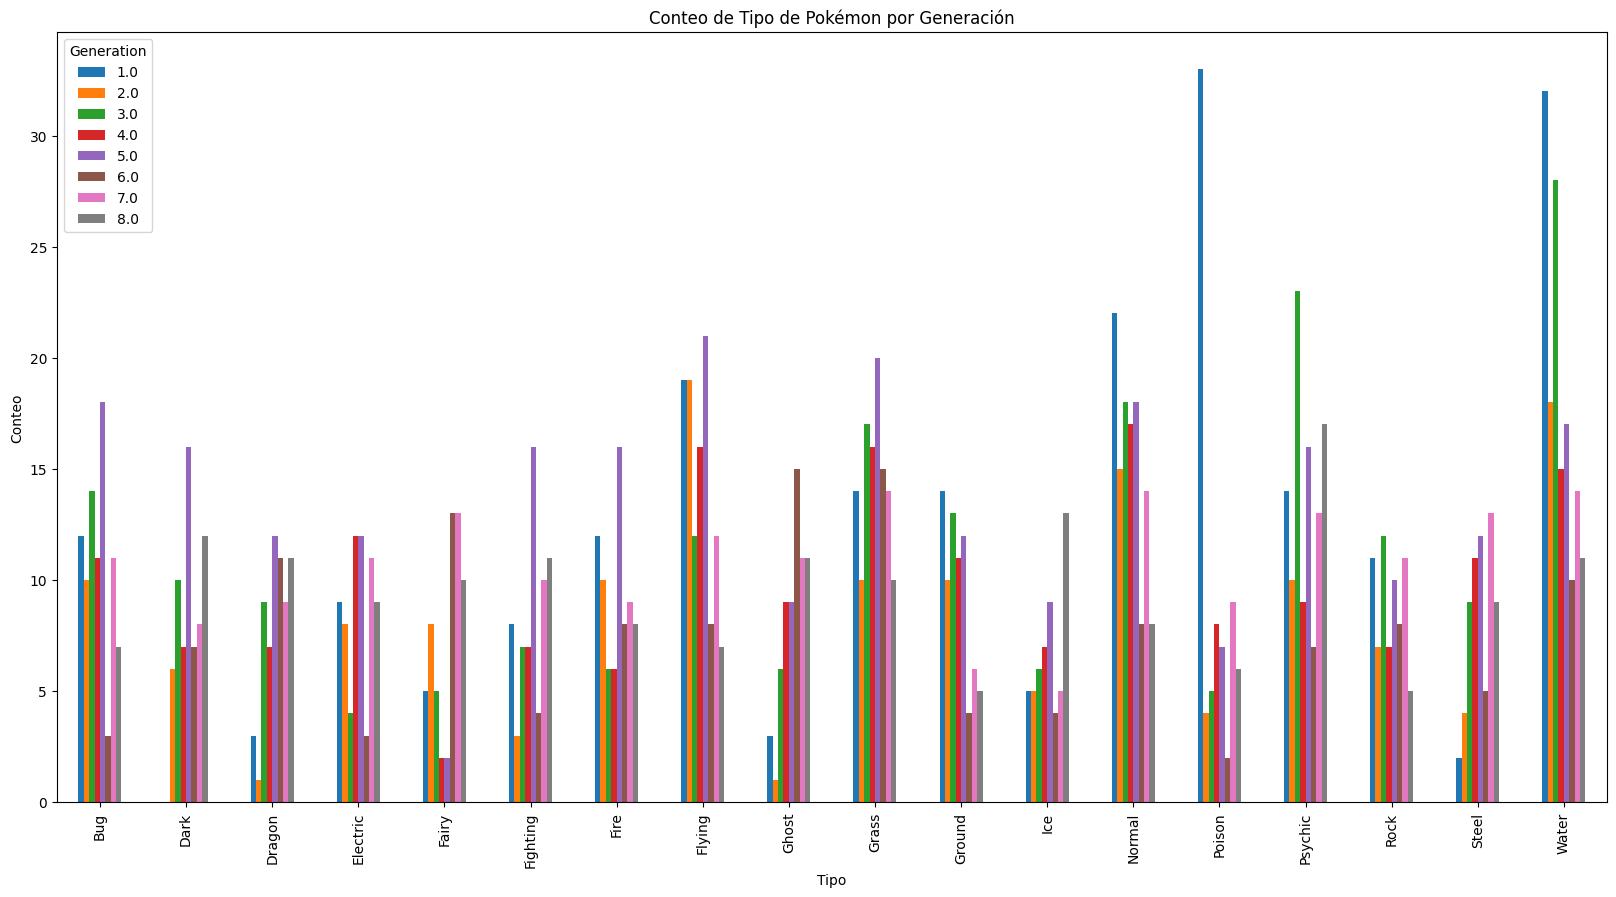

In [ ]:
type_data = df_sql[["Type 1", "Type 2", "Generation"]]
type_data = pd.melt(type_data, id_vars="Generation", value_vars=["Type 1", "Type 2"], value_name="Type")
type_data = type_data.drop("variable", axis=1)
type_data = type_data.dropna()

type_counts = type_data.groupby(["Type", "Generation"]).size().reset_index(name="Count")

type_counts_pivot = type_counts.pivot_table(index="Type", columns="Generation", values="Count", aggfunc=sum)

type_counts_pivot.plot(kind="bar", stacked=False)

plt.title("Conteo de Tipo de Pokémon por Generación")
plt.xlabel("Tipo")
plt.ylabel("Conteo")

plt.show()

##Pregunta 4
¿Cuál es el conteo de cada tipo Pokémon introducido en cada generación?

In [ ]:
type_counts_pivot = type_counts_pivot.fillna(0)
type_counts_pivot

Generation,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Type,,,,,,,,
Bug,12.0,10.0,14.0,11.0,18.0,3.0,11.0,7.0
Dark,0.0,6.0,10.0,7.0,16.0,7.0,8.0,12.0
Dragon,3.0,1.0,9.0,7.0,12.0,11.0,9.0,11.0
Electric,9.0,8.0,4.0,12.0,12.0,3.0,11.0,9.0
Fairy,5.0,8.0,5.0,2.0,2.0,13.0,13.0,10.0
Fighting,8.0,3.0,7.0,7.0,16.0,4.0,10.0,11.0
Fire,12.0,10.0,6.0,6.0,16.0,8.0,9.0,8.0
Flying,19.0,19.0,12.0,16.0,21.0,8.0,12.0,7.0
Ghost,3.0,1.0,6.0,9.0,9.0,15.0,11.0,11.0


##Pregunta 5
¿Cuáles son los 10 Pokémon con más resistencias?

In [ ]:
def resist():
  df_sql['Inmune'] = df_sql.iloc[:,20:38].eq(0).sum(axis=1)
  df_sql['Resistente x2'] = df_sql.iloc[:,20:38].eq(0.25).sum(axis=1)
  df_sql['Resistente'] = df_sql.iloc[:,20:38].eq(0.5).sum(axis=1)
  df_sql['Neutral'] = df_sql.iloc[:,20:38].eq(1).sum(axis=1)
  df_sql['Debil'] = df_sql.iloc[:,20:38].eq(2).sum(axis=1)
  df_sql['Debil x2'] = df_sql.iloc[:,20:38].eq(4).sum(axis=1)
  df_sql['Resistencia_Total'] = df_sql.iloc[:,20:38].sum(axis=1)
  res_col = ["Number", "Name", "Type 1", "Type 2", "Inmune","Resistente x2","Resistente","Neutral","Debil", "Debil x2",   "Resistencia_Total"]
  resistencias = df_sql.loc[:, res_col].sort_values(by= 'Resistencia_Total', ascending=True).head(10)
  return resistencias


In [ ]:
resist()

,Number,Name,Type 1,Type 2,Inmune,Resistente x2,Resistente,Neutral,Debil,Debil x2,Resistencia_Total
967,888,Zacian Crowned Sword,Fairy,Steel,2,1,8,5,2,0,13.25
336,303,Mawile,Steel,Fairy,2,1,8,5,2,0,13.25
765,707,Klefki,Steel,Fairy,2,1,8,5,2,0,13.25
878,801,Magearna,Steel,Fairy,2,1,8,5,2,0,13.25
257,227,Skarmory,Steel,Flying,2,2,6,6,2,0,13.50
871,797,Celesteela,Steel,Flying,2,2,6,6,2,0,13.50
900,823,Corviknight,Flying,Steel,2,2,6,6,2,0,13.50
736,679,Honedge,Steel,Ghost,3,1,8,2,4,0,14.25
962,884,Duraludon,Steel,Dragon,1,1,8,6,2,0,14.25
526,483,Dialga,Steel,Dragon,1,1,8,6,2,0,14.25
